# A gaussian integral

In [1]:
import numpy as np
import scipy.stats
import pylab as plt
from tqdm.notebook import tqdm

Let us create the Gaussian distribution

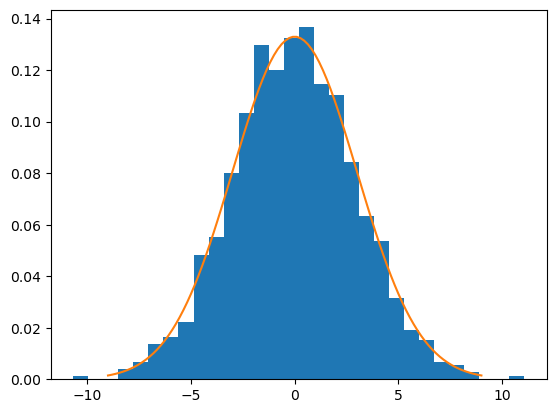

In [2]:
mean = 0
sigma = 3
N = 1000 #numbers of samples
N_tot = 10000#number of time i make the integral

gauss = scipy.stats.norm(loc=0, scale=sigma) #loc= mean ; scale= sigma
plt.hist(gauss.rvs(N), density = True, bins=30) 
plt.plot(np.linspace(-3*sigma,3*sigma,100), gauss.pdf(np.linspace(-3*sigma,3*sigma,100)))


The line command:
   - gauss = scipy.stats.norm(loc=0, scale=sigma)
   - gauss.rvs(N) , it extract numbers from gauss distribution
   
allowed us to generate random number that follow a gaussian distribution

**a) Compute the integral:**

$$\int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx = 2\sigma^4.$$

Let us consider only the histogram from 0 to infinity

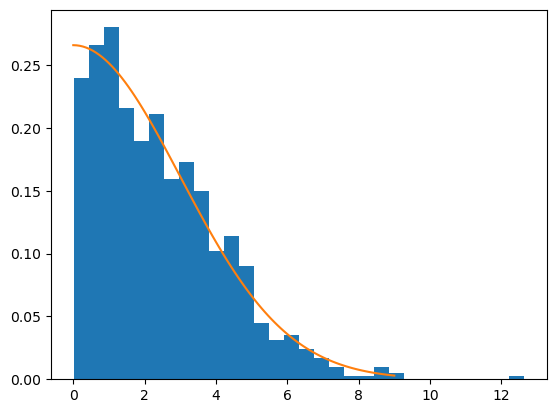

In [3]:
halfgauss = scipy.stats.halfnorm(loc=0, scale=sigma) #loc= mean ; scale= sigma
plt.hist(halfgauss.rvs(N), density = True, bins=30)
plt.plot(np.linspace(0*sigma,3*sigma,100), halfgauss.pdf(np.linspace(0*sigma,3*sigma,100)))

#plt.hist(np.abs(gauss.rvs(), density = True, bins=30)--> np.abs will consider the absolute value.

- Now I use the Monte Carlo method and check the result

In [4]:
def empirical_integral(sigma,N):
    gauss = scipy.stats.norm(loc=0, scale=sigma) #loc= mean ; scale= sigma
    sample = np.abs(gauss.rvs(N))
    return sigma*np.sqrt(np.pi/2)*np.mean(sample**3) #f(x)=x**3 --> xi**3

def real_integral(sigma):
    return 2*sigma**4

print(empirical_integral(sigma, N))
print(real_integral(sigma))

161.3492850935385
162


**b) Does the result converge with the number of samples?** 

- Let's understand if the result converge with number of samples

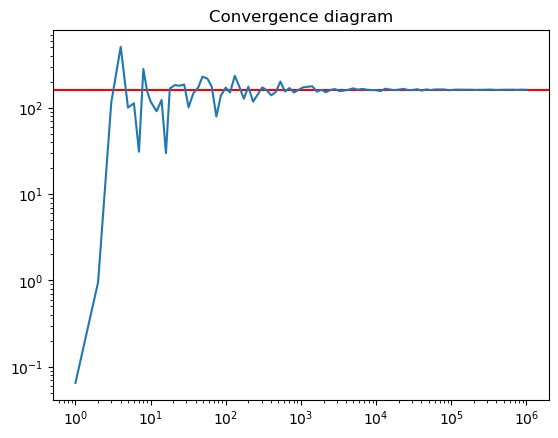

In [5]:
xgrid = np.unique(np.logspace(0,6,100,dtype =int))

y = [empirical_integral(sigma,N) for N in xgrid]
y = np.array(y)

plt.axhline(real_integral(sigma),c='red')
plt.plot(xgrid,y)
plt.loglog()
plt.title("Convergence diagram")
plt.show()


- Let's compute the error

$$ err = \frac{x_i - I}{I}$$

where $x_i$ is the value of *empirical_integral(sigma,N)* while $I$ is the value of *real_integral(sigma)*

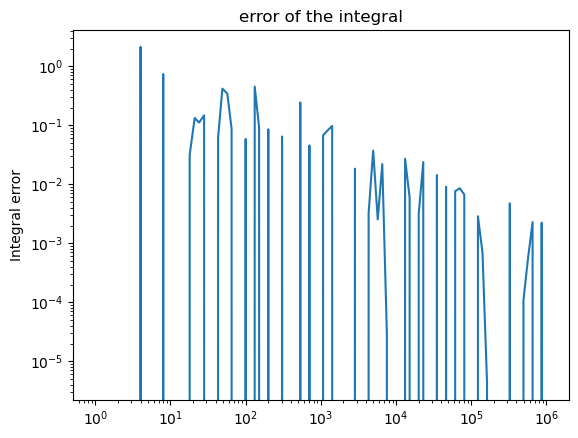

In [6]:
err = []

for i in range (0,len(y)):
    err.append((y[i] - real_integral(sigma))/real_integral(sigma))
    
err = np.array(err) 

plt.plot(xgrid,err)
plt.ylabel("Integral error")
plt.loglog()
plt.title("error of the integral")
plt.show()

**c) For a given N, how are the result distribuited?**

- I have fixed n= 1000

sample mean= 161.60995104214823
sample variance= 137.4244332762709


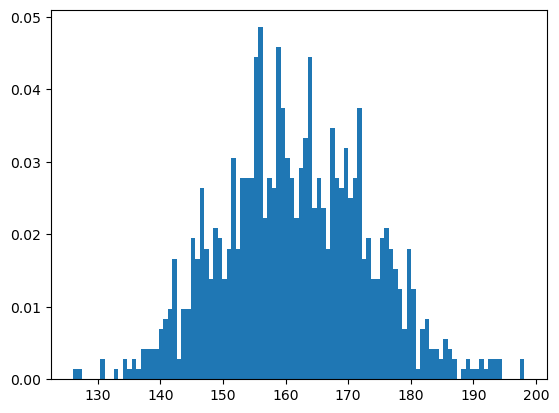

In [7]:
n = 1000

results = []

for i in range (0,n):
    results.append(empirical_integral(sigma,N))
results = np.array(results)

print("sample mean=",np.mean(results))
print("sample variance=",np.var(results))

plt.hist(results,density = True, bins=100);
plt.show()

- I change the number of samples

sample mean= 162.1814388597068
sample variance= 136.50843826045718


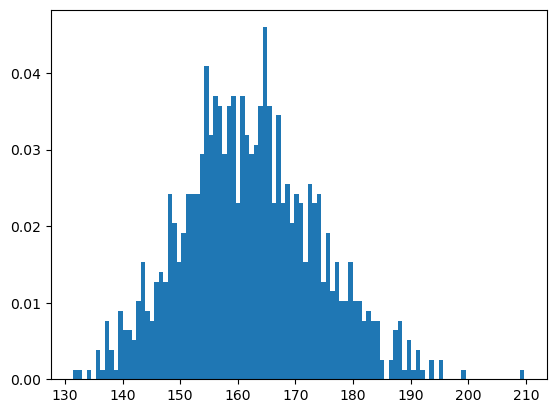

sample mean= 162.1627679188871
sample variance= 86.60292205999914


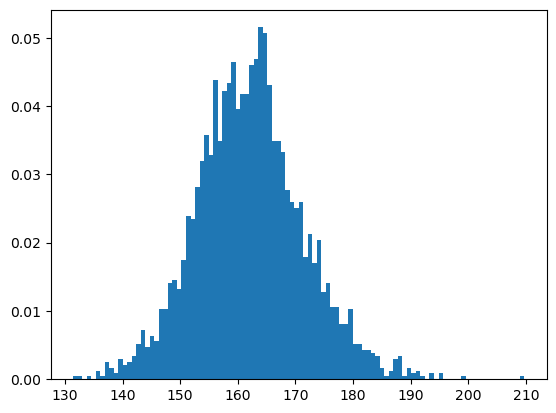

sample mean= 162.0449339578064
sample variance= 48.70230089241484


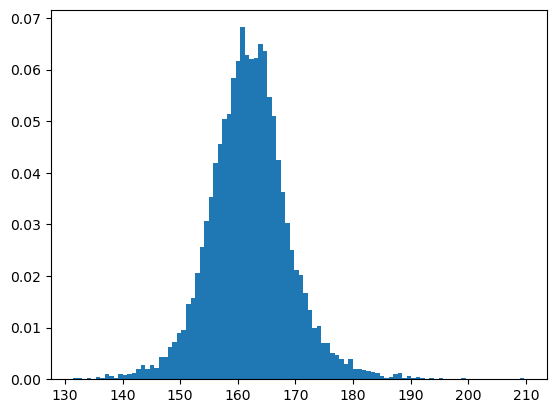

sample mean= 161.99744976738552
sample variance= 28.737698580439037


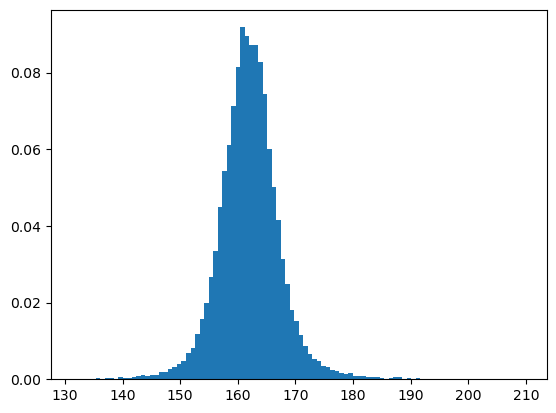

In [8]:
a=[1000,2000,5000,10000]

mean = []
var =[]
h = []

for j in range(0,4):
    for i in range(0,a[j]):
        h.append(empirical_integral(sigma,a[j]))
    mean.append(np.mean(h))
    var.append(np.var(h))
    print("sample mean=",np.mean(h))
    print("sample variance=",np.var(h))
    plt.hist(h,density=True,bins=100);
    plt.show()

mean=np.array(mean)
var=np.array(var)

Text(0.5, 1.0, 'Variance')

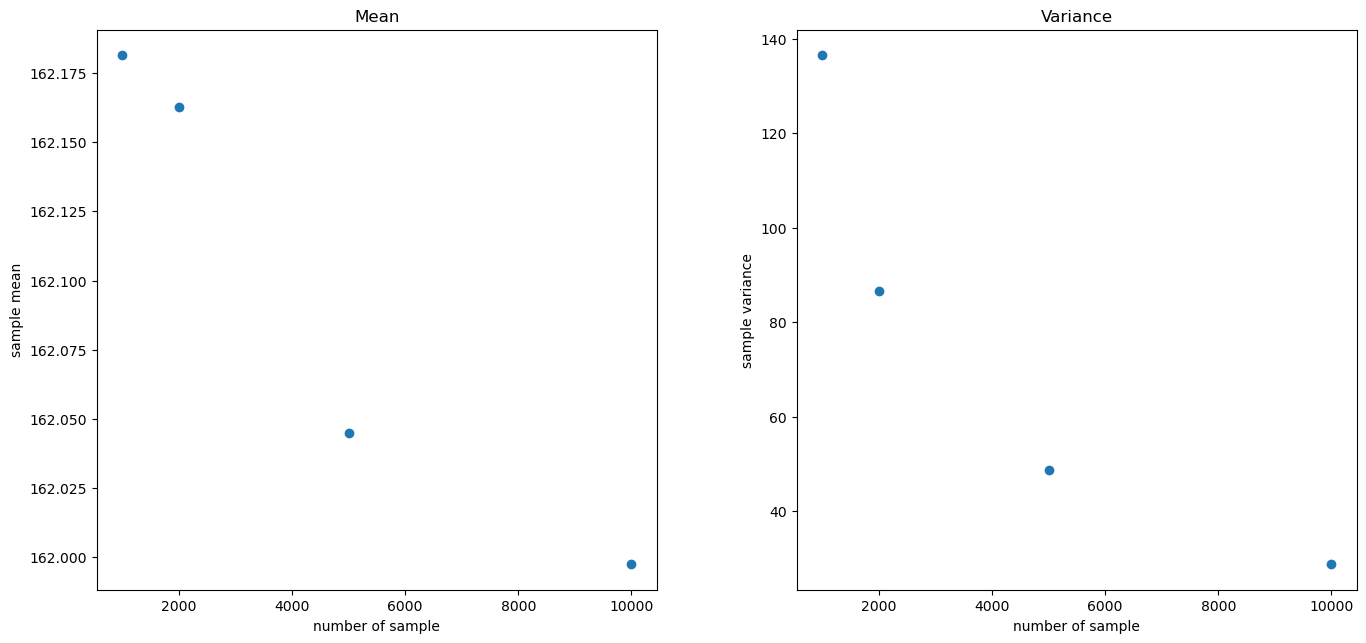

In [9]:
fig = plt.figure(figsize=(15,8))
fig.subplots_adjust(left=0.11,right=0.95,bottom=0.2,top=0.9,wspace=0.25)

ax =fig.add_subplot(121)
ax.scatter(a,mean)
ax.set_xlabel("number of sample")
ax.set_ylabel("sample mean")
ax.set_title("Mean")

ax =fig.add_subplot(122)
ax.scatter(a,var)
ax.set_xlabel("number of sample")
ax.set_ylabel("sample variance")
ax.set_title("Variance")